In [1]:
import pandas as pd
data = pd.read_csv('36100104.csv')
data.head()

,REF_DATE,GEO,DGUID,Prices,Seasonal adjustment,Estimates,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1961-01,Canada,2016A000011124,Chained (2017) dollars,Seasonally adjusted at annual rates,Final consumption expenditure,Dollars,81,millions,6,v62305723,1.1.1.1,293535.0,NaN,NaN,NaN,0
1,1961-01,Canada,2016A000011124,Chained (2017) dollars,Seasonally adjusted at annual rates,Household final consumption expenditure,Dollars,81,millions,6,v62305724,1.1.1.2,193805.0,NaN,NaN,NaN,0
2,1961-01,Canada,2016A000011124,Chained (2017) dollars,Seasonally adjusted at annual rates,Goods,Dollars,81,millions,6,v62305725,1.1.1.3,85028.0,NaN,NaN,NaN,0
3,1961-01,Canada,2016A000011124,Chained (2017) dollars,Seasonally adjusted at annual rates,Durable goods,Dollars,81,millions,6,v62305726,1.1.1.4,7744.0,NaN,NaN,NaN,0
4,1961-01,Canada,2016A000011124,Chained (2017) dollars,Seasonally adjusted at annual rates,Semi-durable goods,Dollars,81,millions,6,v62305727,1.1.1.5,10318.0,NaN,NaN,NaN,0


In [2]:
data.shape

(60934, 17)

In [3]:
data.dtypes

REF_DATE                object
GEO                     object
DGUID                   object
Prices                  object
Seasonal adjustment     object
Estimates               object
UOM                     object
UOM_ID                   int64
SCALAR_FACTOR           object
SCALAR_ID                int64
VECTOR                  object
COORDINATE              object
VALUE                  float64
STATUS                  object
SYMBOL                 float64
TERMINATED              object
DECIMALS                 int64
dtype: object

In [4]:
# Convert REF_DATE to datetime, assuming the month number represents the start of the quarter
data['REF_DATE'] = pd.to_datetime(data['REF_DATE'], format='%Y-%m')

# If you need to explicitly handle these as quarters, you might want to convert them to period
# data['REF_DATE'] = data['REF_DATE'].dt.to_period('Q')

In [5]:
data.head()

,REF_DATE,GEO,DGUID,Prices,Seasonal adjustment,Estimates,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1961-01-01,Canada,2016A000011124,Chained (2017) dollars,Seasonally adjusted at annual rates,Final consumption expenditure,Dollars,81,millions,6,v62305723,1.1.1.1,293535.0,NaN,NaN,NaN,0
1,1961-01-01,Canada,2016A000011124,Chained (2017) dollars,Seasonally adjusted at annual rates,Household final consumption expenditure,Dollars,81,millions,6,v62305724,1.1.1.2,193805.0,NaN,NaN,NaN,0
2,1961-01-01,Canada,2016A000011124,Chained (2017) dollars,Seasonally adjusted at annual rates,Goods,Dollars,81,millions,6,v62305725,1.1.1.3,85028.0,NaN,NaN,NaN,0
3,1961-01-01,Canada,2016A000011124,Chained (2017) dollars,Seasonally adjusted at annual rates,Durable goods,Dollars,81,millions,6,v62305726,1.1.1.4,7744.0,NaN,NaN,NaN,0
4,1961-01-01,Canada,2016A000011124,Chained (2017) dollars,Seasonally adjusted at annual rates,Semi-durable goods,Dollars,81,millions,6,v62305727,1.1.1.5,10318.0,NaN,NaN,NaN,0


In [6]:
data.dtypes

REF_DATE               datetime64[ns]
GEO                            object
DGUID                          object
Prices                         object
Seasonal adjustment            object
Estimates                      object
UOM                            object
UOM_ID                          int64
SCALAR_FACTOR                  object
SCALAR_ID                       int64
VECTOR                         object
COORDINATE                     object
VALUE                         float64
STATUS                         object
SYMBOL                        float64
TERMINATED                     object
DECIMALS                        int64
dtype: object

In [7]:
data.shape

(60934, 17)

In [8]:
# Apply the filter to select GDP 
data = data[
    (data['Prices'] == 'Current prices') &
    (data['Seasonal adjustment'] == 'Seasonally adjusted at annual rates') &
    (data['Estimates'] == 'Gross domestic product at market prices') &
    (data['UOM'] == 'Dollars')
]

data.reset_index(drop=True, inplace=True)

In [9]:
data.shape

(252, 17)

In [10]:
data.head()

,REF_DATE,GEO,DGUID,Prices,Seasonal adjustment,Estimates,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1961-01-01,Canada,2016A000011124,Current prices,Seasonally adjusted at annual rates,Gross domestic product at market prices,Dollars,81,millions,6,v62305783,1.2.1.30,40600.0,NaN,NaN,NaN,0
1,1961-04-01,Canada,2016A000011124,Current prices,Seasonally adjusted at annual rates,Gross domestic product at market prices,Dollars,81,millions,6,v62305783,1.2.1.30,41496.0,NaN,NaN,NaN,0
2,1961-07-01,Canada,2016A000011124,Current prices,Seasonally adjusted at annual rates,Gross domestic product at market prices,Dollars,81,millions,6,v62305783,1.2.1.30,42604.0,NaN,NaN,NaN,0
3,1961-10-01,Canada,2016A000011124,Current prices,Seasonally adjusted at annual rates,Gross domestic product at market prices,Dollars,81,millions,6,v62305783,1.2.1.30,43404.0,NaN,NaN,NaN,0
4,1962-01-01,Canada,2016A000011124,Current prices,Seasonally adjusted at annual rates,Gross domestic product at market prices,Dollars,81,millions,6,v62305783,1.2.1.30,44624.0,NaN,NaN,NaN,0


In [11]:
data = data[['REF_DATE', 'VALUE']]

In [12]:
data.tail()

,REF_DATE,VALUE
247,2022-10-01,2839556.0
248,2023-01-01,2837328.0
249,2023-04-01,2860424.0
250,2023-07-01,2905548.0
251,2023-10-01,2952380.0


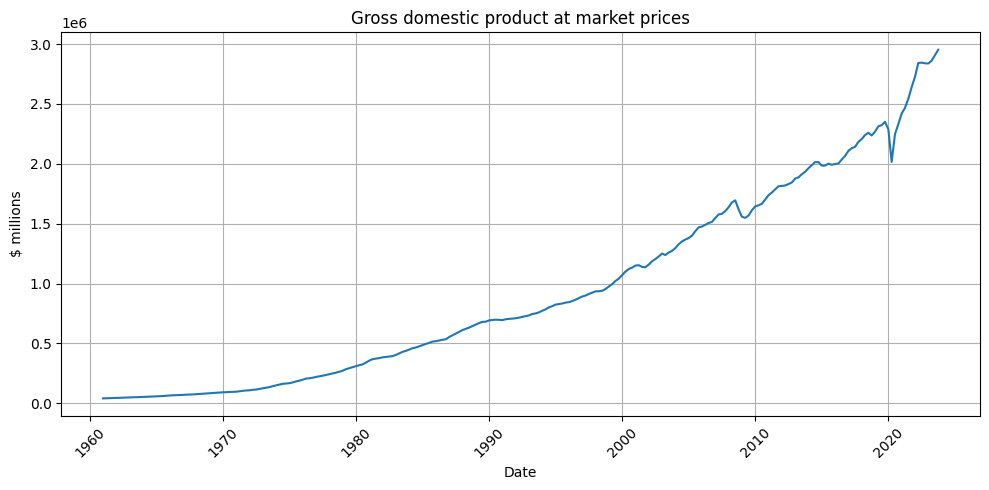

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))  # Set the figure size for better readability
plt.plot(data['REF_DATE'], data['VALUE'])  # Line plot with dots at each data point
plt.title('Gross domestic product at market prices')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('$ millions')  # Y-axis label
plt.grid(True)  # Add grid for easier visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
plt.show()


In [14]:
import pandas as pd

# Assuming 'canada_data' is your DataFrame with 'REF_DATE' as the index
# Reset the index to convert the index into a column
data = data.reset_index()

# Rename columns to match the required output
data = data.rename(columns={'REF_DATE': 'ds', 'VALUE': 'y'})

# Add the 'unique_id' column with all values set to 'Canada'
data['unique_id'] = 'Canada'

# Rearrange the columns order
data = data[['unique_id', 'ds', 'y']]

# Now 'data' is your transformed DataFrame
data.head()


,unique_id,ds,y
0,Canada,1961-01-01,40600.0
1,Canada,1961-04-01,41496.0
2,Canada,1961-07-01,42604.0
3,Canada,1961-10-01,43404.0
4,Canada,1962-01-01,44624.0


In [15]:
from statsforecast.models import (
    HoltWinters,
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    SeasonalNaive,
    AutoARIMA,
    AutoETS
    
)

c:\Users\owner\anaconda3\envs\mma867\Lib\site-packages\statsforecast\core.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [16]:
# Create a list of models and instantiation parameters
models = [
    AutoARIMA(),
    AutoETS(),
    HoltWinters(),
    HistoricAverage(),
    DOT(season_length=4)
]

In [17]:
from statsforecast import StatsForecast

# Instantiate StatsForecast class as sf
sf = StatsForecast( 
    models=models,
    freq='qs', 
    fallback_model = SeasonalNaive(season_length=7),
    n_jobs=-1,
    df=data, 
)

c:\Users\owner\anaconda3\envs\mma867\Lib\site-packages\statsforecast\core.py:399: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [18]:
sf.fit()

c:\Users\owner\anaconda3\envs\mma867\Lib\site-packages\statsforecast\core.py:399: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


StatsForecast(models=[AutoARIMA,AutoETS,HoltWinters,HistoricAverage,DynamicOptimizedTheta])

In [19]:
# Forecast the next 104 points (since the data is quarterly, 104 points cover 26 years)
forecast = sf.predict(h=(10*4))
forecast.head()

c:\Users\owner\anaconda3\envs\mma867\Lib\site-packages\statsforecast\core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoARIMA,AutoETS,SeasonalNaive,HistoricAverage,DynamicOptimizedTheta
unique_id,,,,,,
Canada,2024-01-01,2978682.75,2989540.50,2842144.0,943451.6875,2964838.00
Canada,2024-04-01,3003390.00,3026702.00,2844872.0,943451.6875,2973710.25
Canada,2024-07-01,3028097.00,3063863.50,2839556.0,943451.6875,2985631.50
Canada,2024-10-01,3052804.25,3101025.00,2837328.0,943451.6875,2994868.50
Canada,2025-01-01,3077511.50,3138186.75,2860424.0,943451.6875,3007983.50


c:\Users\owner\anaconda3\envs\mma867\Lib\site-packages\statsforecast\core.py:1329: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


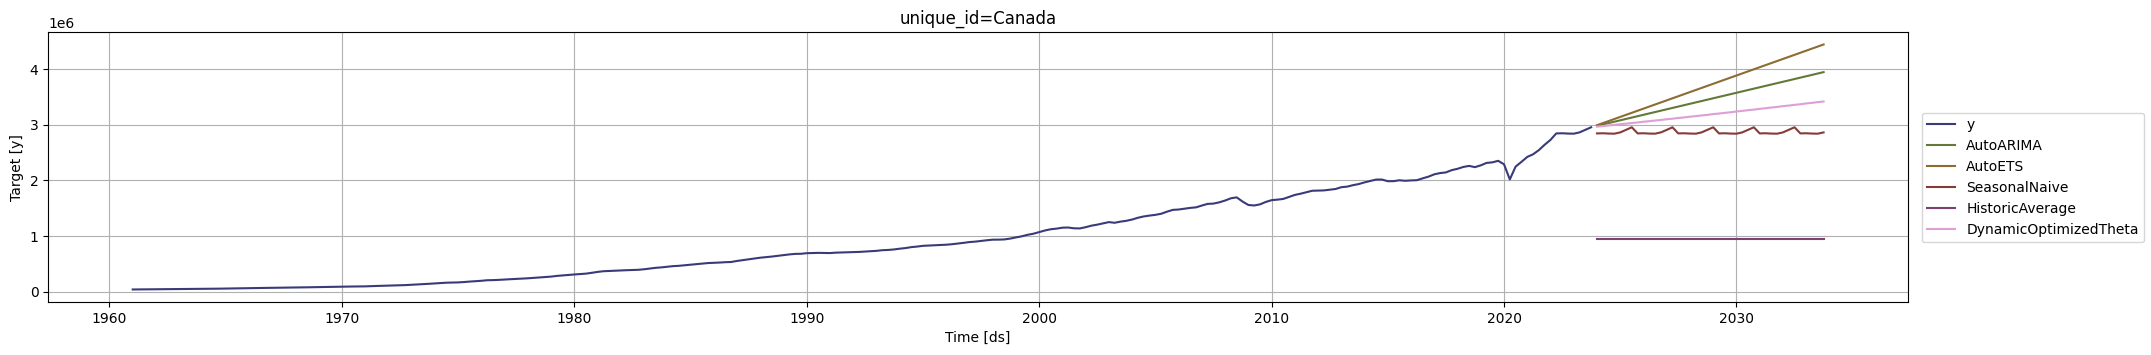

In [20]:
sf.plot(data, forecast)

# Model Selection using PyCaret

In [21]:
import pycaret
pycaret.__version__

'3.3.1'

In [22]:
data.head()

,unique_id,ds,y
0,Canada,1961-01-01,40600.0
1,Canada,1961-04-01,41496.0
2,Canada,1961-07-01,42604.0
3,Canada,1961-10-01,43404.0
4,Canada,1962-01-01,44624.0


In [23]:
data.set_index('ds', inplace=True, drop=True)
data = pd.Series(data['y'])

In [24]:
data.head()

ds
1961-01-01    40600.0
1961-04-01    41496.0
1961-07-01    42604.0
1961-10-01    43404.0
1962-01-01    44624.0
Name: y, dtype: float64

In [25]:
from pycaret.time_series import *
s = setup(data, fold = 5, fh = 4, session_id = 123)

,Description,Value
0,session_id,123
1,Target,y
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(252, 1)"
5,Transformed data shape,"(252, 1)"
6,Transformed train set shape,"(248, 1)"
7,Transformed test set shape,"(4, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [26]:
plot_model(plot='ts')

In [27]:
plot_model(plot = 'train_test_split')

In [28]:
plot_model(plot = 'cv')

In [29]:
plot_model(plot = 'decomp')

In [30]:
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,8.0836,5.6857,108426.1019,124763.1387,0.0443,0.0446,-4.5613,0.0780
theta,Theta Forecaster,8.5220,5.9220,113621.5803,128475.2550,0.0466,0.0468,-4.4924,0.0280
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,8.5568,5.8973,114161.7459,128310.8575,0.0468,0.0470,-4.2652,0.0700
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,8.5568,5.8973,114161.7459,128310.8574,0.0468,0.0470,-4.2652,0.0820
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,8.5568,5.8973,114161.7459,128310.8575,0.0468,0.0470,-4.2652,0.2240
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,8.5568,5.8973,114161.7459,128310.8574,0.0468,0.0470,-4.2652,0.1720
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,8.5568,5.8973,114161.7459,128310.8574,0.0468,0.0470,-4.2652,0.0880
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,8.5568,5.8973,114161.7459,128310.8575,0.0468,0.0470,-4.2652,0.0680
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,8.5604,5.8994,114214.2744,128367.8429,0.0468,0.0470,-4.2721,0.0620
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,9.0791,6.2259,121268.0142,135908.2230,0.0496,0.0499,-5.6076,0.0820


In [31]:
best

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [1]},
                                                   n_jobs=1)],
                    regressor=DecisionTreeRegressor(random_state=123),
                    window_length=1)

In [32]:
dt = create_model('dt_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2017Q4,4.5274,3.4065,51388.5426,54476.5040,0.0229,0.0232,-7.5998
1,2018Q4,2.8835,2.4938,33391.5055,40386.4953,0.0143,0.0145,-0.9105
2,2019Q4,10.8937,10.7185,129269.1180,177445.9368,0.0616,0.0581,-1.1189
3,2020Q4,12.4706,6.7642,179420.0759,196996.6090,0.0703,0.0734,-4.6640
4,2021Q4,9.6429,5.0455,148661.2673,154510.1485,0.0526,0.0541,-8.5134
Mean,NaT,8.0836,5.6857,108426.1019,124763.1387,0.0443,0.0446,-4.5613
SD,NaT,3.7219,2.9081,56527.7242,64711.1505,0.0219,0.0222,3.1636


In [33]:
plot_model(dt, plot = 'forecast')

In [34]:
final_dt = finalize_model(dt)

In [35]:
plot_model(final_dt, plot = 'forecast', data_kwargs= {'fh' : 20})

In [36]:
predictions = predict_model(final_dt, fh = 104)

In [37]:
# Convert the quarter index to the desired datetime format
predictions.index = pd.PeriodIndex(predictions.index, freq='Q').to_timestamp(how='start')

In [38]:
predictions.head()

,y_pred
2024-01-01,2.963008e+06
2024-04-01,2.973635e+06
2024-07-01,2.984263e+06
2024-10-01,2.994890e+06
2025-01-01,3.005518e+06


In [39]:
predictions.to_csv('GDP_forecast.csv')